In [4]:
import pandas as pd

file = pd.read_csv("/home/nicro/Downloads/archive/AI_Human.csv")
file.head()

/tmp/ipykernel_14367/1574514904.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [12]:
file['generated'].value_counts()

generated
0.0    305797
1.0    181438
Name: count, dtype: int64

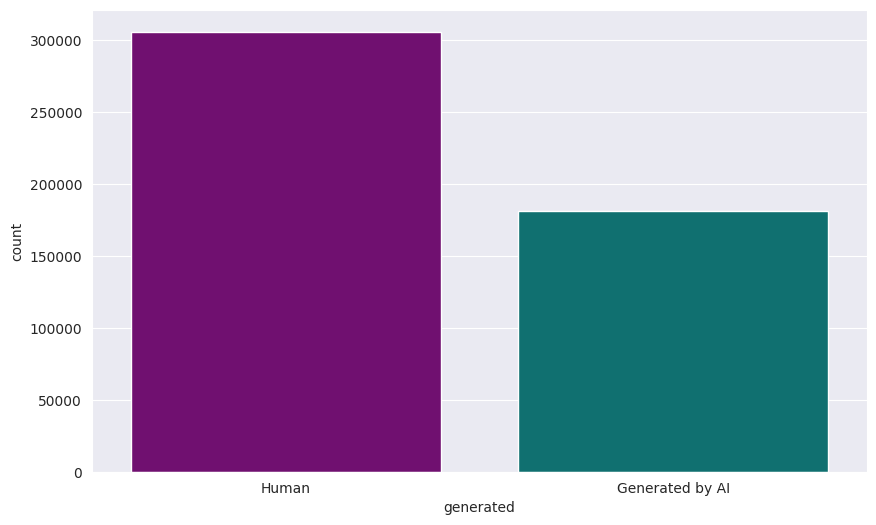

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10,  6))
class_names = ['Human', 'Generated by AI']
custom_palette = ['Purple', 'teal']

# Use 'hue' instead of 'palette' and set 'legend=False'
sns.countplot(x='generated', hue='generated', data=file, palette=custom_palette, legend=False)

plt.xticks(range(len(class_names)))
plt.gca().set_xticklabels(class_names)

plt.show()


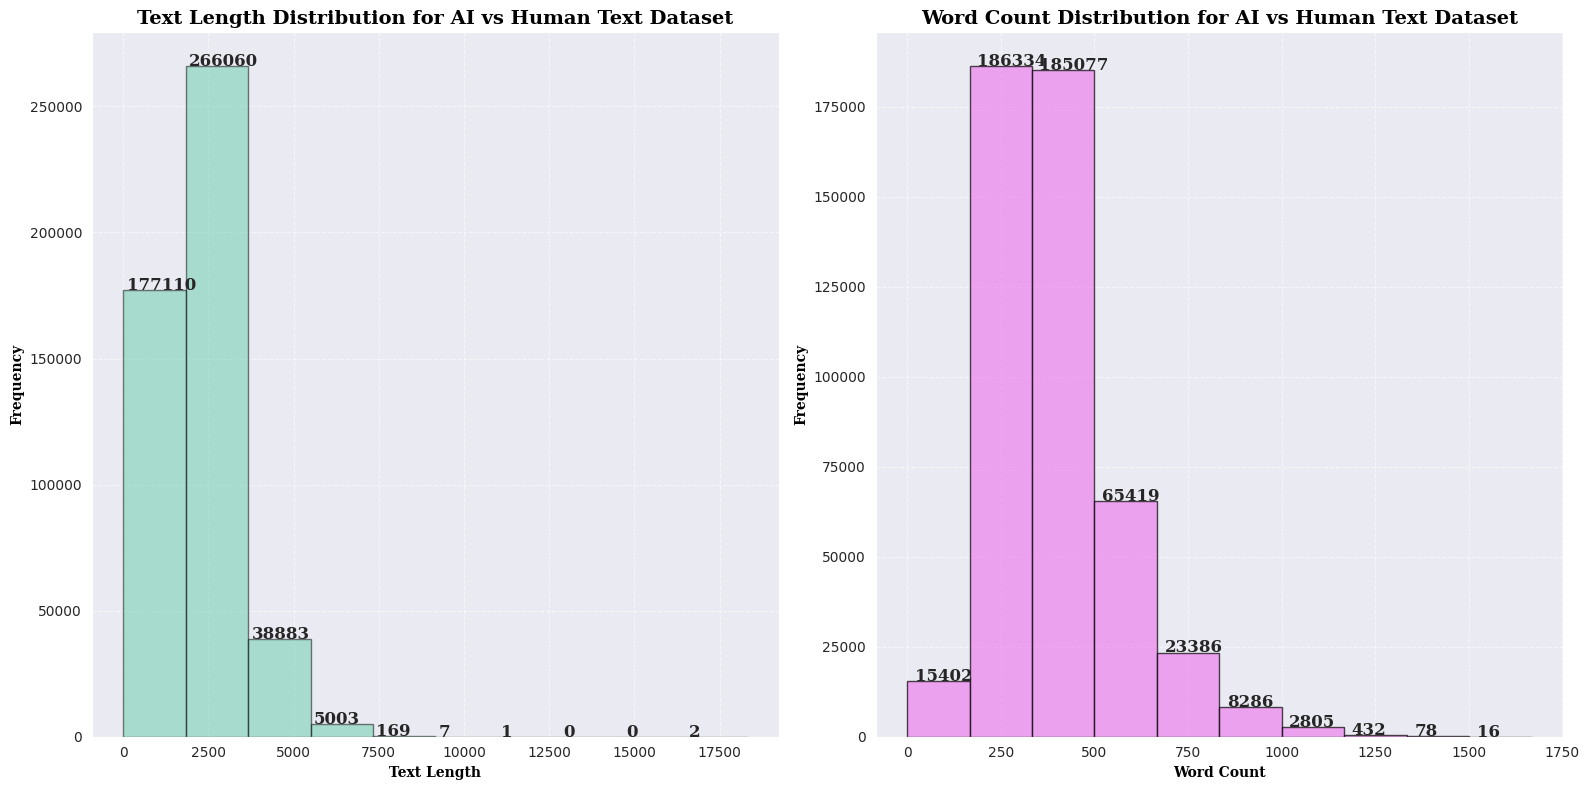

In [14]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def visualize_text_data(data, title):
    # Calculate text length for each entry in the 'text' column and store the results in a new column
    data['text_length'] = data['text'].apply(len)
    
    # Calculate word count for each entry in the 'text' column and store the results in a new column
    data['text_word_count'] = data['text'].apply(lambda x: len(str(x).split()))

    # Create a figure with a larger size
    plt.figure(figsize=(16, 8))

    # Define a custom font with a nice appearance
    custom_font = FontProperties(family='serif', style='normal', size=14, weight='bold')

    # First subplot for text length distribution
    plt.subplot(1, 2, 1)
    n, bins, patches = plt.hist(data['text_length'], bins=10, color='mediumaquamarine', edgecolor='black', alpha=0.5, label='News Article')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Text Length", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')
    plt.title(f'Text Length Distribution for {title}', fontsize=12, fontproperties=custom_font, color='black')

    # Annotate the plot with bin values (vertical text)
    for bin_val, freq in zip(bins, n):
        plt.text(bin_val+100, freq+20, f'{int(freq)}', ha='left', va='baseline', fontsize=12, fontproperties=custom_font)

    # Second subplot for word count distribution
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(data['text_word_count'], bins=10, color='violet', edgecolor='black', alpha=0.7, label='News Article')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Word Count", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')
    plt.title(f'Word Count Distribution for {title}', fontsize=12, fontproperties=custom_font, color='black')

    # Annotate the plot with bin values (vertical text)
    for bin_val, freq in zip(bins, n):
        
        plt.text(bin_val+20, freq+20, f'{int(freq)}', ha='left', va='baseline', fontsize=12, fontproperties=custom_font)

    # Adjust the layout for subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

visualize_text_data(file, "AI vs Human Text Dataset")

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve

In [16]:
pipeMNB = Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),('clf',MultinomialNB())])
pipeCNB = Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),('clf',ComplementNB())])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(file['text'], file['generated'],test_size=0.2)

In [19]:
pipeMNB.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', MultinomialNB())])

In [ ]:
pipeCNB.fit(x_train,y_train)

In [3]:
predictMNB = pipeMNB.predict(x_test)
#predictCNB = pipeCNB.predict(x_test)

NameError: name 'pipeMNB' is not defined

In [ ]:
mnb = accuracy_score(y_test,predictMNB)
#cnb = accuracy_score(y_test,predictCNB)

In [ ]:
print(f"MNB: {mnb*100:.2f}%")
#print(f"CNB: {cnb*100:.2f}%")

In [ ]:
print("Classification Report for Multinomial Naive Bayes:")
print(classification_report(y_test, predictMNB))
#print("\nClassification Report for Complement Naive Bayes:")
#print(classification_report(y_test, predictCNB))